In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
sec_dpc = (sec['Close']-sec['Close'].shift(1)) / sec['Close'].shift(1) * 100
sec_dpc.iloc[0] = 0 # 일간 변동률의 첫 번째 값인 NaN을 0으로 변경한다.
sec_dpc_cp = ((100+sec_dpc)/100).cumprod()*100-100 # 일간 변동률 누적곱 계산

msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')
msft_dpc = (msft['Close'] / msft['Close'].shift(1) -1) * 100
msft_dpc.iloc[0] = 0
msft_dpc_cp = ((100+msft_dpc)/100).cumprod()*100-100

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
sec.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,53000.0,53900.0,51800.0,51900.0,46191.066406,39565391
2018-05-08,52600.0,53200.0,51900.0,52600.0,46814.070312,23104720
2018-05-09,52600.0,52800.0,50900.0,50900.0,45301.070312,16128305
2018-05-10,51700.0,51700.0,50600.0,51600.0,45924.074219,13905263
2018-05-11,52000.0,52200.0,51200.0,51300.0,45657.074219,10314997
2018-05-14,51000.0,51100.0,49900.0,50100.0,44589.062500,14909272
2018-05-15,50200.0,50400.0,49100.0,49200.0,43788.078125,18709146
2018-05-16,49200.0,50200.0,49150.0,49850.0,44366.570312,15918683
2018-05-17,50300.0,50500.0,49400.0,49400.0,43966.066406,10365440


In [9]:
sec['Close']

Date
2018-05-04    51900.0
2018-05-08    52600.0
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
               ...   
2022-01-24    75100.0
2022-01-25    74000.0
2022-01-26    74000.0
2022-01-27    71300.0
2022-01-28    73300.0
Name: Close, Length: 921, dtype: float64

In [10]:
sec['Close'].shift(1)

Date
2018-05-04        NaN
2018-05-08    51900.0
2018-05-09    52600.0
2018-05-10    50900.0
2018-05-11    51600.0
               ...   
2022-01-24    75600.0
2022-01-25    75100.0
2022-01-26    74000.0
2022-01-27    74000.0
2022-01-28    71300.0
Name: Close, Length: 921, dtype: float64

In [11]:
sec_dpc

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
                ...   
2022-01-24   -0.661376
2022-01-25   -1.464714
2022-01-26    0.000000
2022-01-27   -3.648649
2022-01-28    2.805049
Name: Close, Length: 921, dtype: float64

In [8]:
# 일간 변동율을 이용
sec_dpc_cp.head(10)

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -1.926782
2018-05-10   -0.578035
2018-05-11   -1.156069
2018-05-14   -3.468208
2018-05-15   -5.202312
2018-05-16   -3.949904
2018-05-17   -4.816956
2018-05-18   -4.624277
Name: Close, dtype: float64

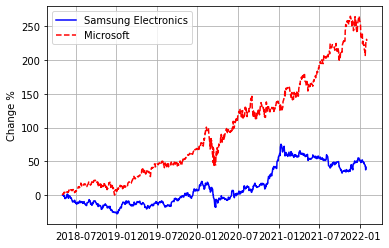

In [6]:
import matplotlib.pyplot as plt
plt.plot(sec.index, sec_dpc_cp, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft_dpc_cp, 'r--', label='Microsoft')
plt.ylabel('Change %') 
plt.grid(True)
plt.legend(loc='best')
plt.show()

### 그래프가 말하고자 하는 것
1. 2018년 5월 4일에 삼성전자에 투자했다면 약 10%의 손실
2. 같은 기간 동안 MS에 투자했다면 48%의 수익